### MDP policy improvement

<img src="MDP_Policy_iteration.png">

In [2]:
import numpy as np

In [3]:
P_tr=np.array([
    [
        [0,1,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
        [0,0,0,0,0,1],
    ],
    [
        [0,0,0,1,0,0],
        [0,1,0,0,0,0],
        [0,0,0,0,0,1],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
    ],
    [
        [1,0,0,0,0,0],
        [1,0,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,1,0,0],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
    ],
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [1,0,0,0,0,0],
        [0,0,0,0,1,0],
        [0,0,1,0,0,0],
    ],
    
])

R_tr=np.array([
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [10]
    ],
])
gamma=0.9
actions=[0,1,2,3]
states=[0,1,2,3,4,5]


### Deterministic

### Value difference based 

In [22]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def get_rewards_and_state(P_tr,R_tr,states,gamma):
    Q=np.zeros(P_tr.shape)
    V=np.zeros(R_tr.shape)
    V_prev=np.ones(R_tr.shape)
    epsilon=0.000000001
    
    log=[]
    
    while ((V-V_prev)**2).sum()**0.5>epsilon:
        Q=R_tr+gamma*np.matmul(P_tr,V)
        V_prev=V.copy()
        V=np.max(Q,axis=0)
        policy=np.argmax(Q,axis=0)
        log.append((policy.flatten(),V.sum()))


    best_pol=sorted(log,key=lambda e:e[1])[-1]
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot([i for i,e in enumerate(log)],[e[1] for e in log])
    return best_pol
    
    
def caller(actions,states,P_tr,R_tr,gamma):
    
    policy=get_rewards_and_state(P_tr,R_tr,states,gamma)
    return policy

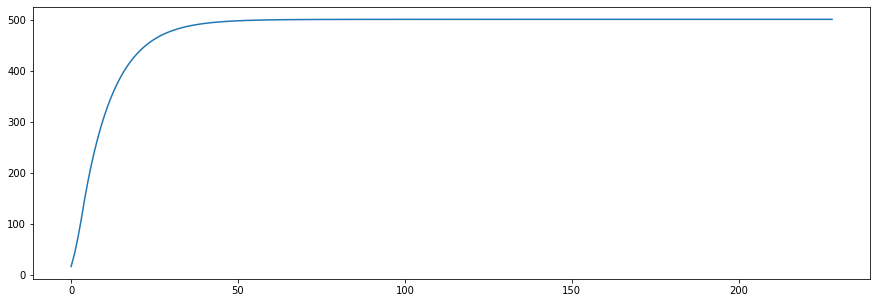

In [23]:
policy=caller(actions,states,P_tr,R_tr,gamma)

In [24]:
policy

(array([1, 2, 0, 0, 0, 3]), 500.46099998006196)

### Policy change based

In [38]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def get_rewards_and_state(P_tr,R_tr,states,gamma):
    Q=np.zeros(P_tr.shape)
    Pi=np.zeros(R_tr.shape)
    V=np.zeros(R_tr.shape)
    Pi_prev=np.ones(R_tr.shape)
    epsilon=0.000000001
    
    log=[]
    
    while (Pi-Pi_prev).sum()!=0:
        Q=R_tr+gamma*np.matmul(P_tr,V)
        Pi_prev=Pi.copy()
        V=np.max(Q,axis=0)
        Pi=np.argmax(Q,axis=0)
        log.append((Pi.flatten(),V.sum()))


    best_pol=sorted(log,key=lambda e:e[1])[-1]
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot([i for i,e in enumerate(log)],[e[1] for e in log])
    return best_pol
    
    
def caller(actions,states,P_tr,R_tr,gamma):
    
    policy=get_rewards_and_state(P_tr,R_tr,states,gamma)
    return policy

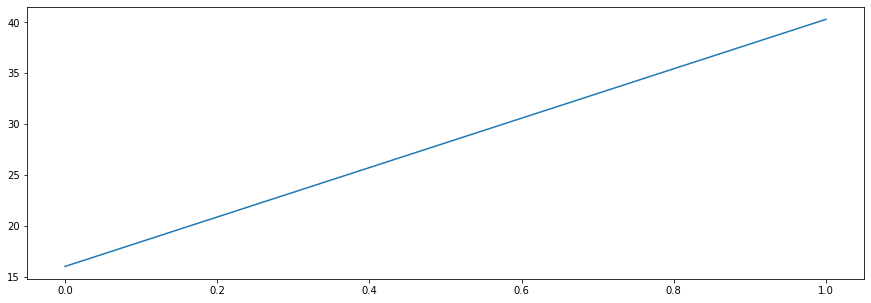

In [41]:
policy=caller(actions,states,P_tr,R_tr,gamma)

In [42]:
policy

(array([0, 0, 0, 0, 0, 3]), 40.3)

### Probabilistic Approach

In [51]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def get_rewards_and_state(P_tr,R_tr,states,gamma):
    Q=np.zeros(P_tr.shape)
    V=np.zeros(R_tr.shape)
    V_prev=np.ones(R_tr.shape)
    epsilon=0.000000001
    
    log=[]
    
    while ((V-V_prev)**2).sum()**0.5>epsilon:
        Q=R_tr+gamma*np.matmul(P_tr,V)
        pi=((np.e**Q)/np.sum(np.e**Q,axis=0))
        V_prev=V.copy()
        V=np.multiply(((np.e**Q)/np.sum(np.e**Q,axis=0)),Q).sum(axis=0)
        log.append((pi.reshape(P_tr.shape[0],P_tr.shape[-1]).transpose(1,0),V.sum()))


    best_pol=sorted(log,key=lambda e:e[1])[-1]
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot([i for i,e in enumerate(log)],[e[1] for e in log])
    return best_pol
    
    
def caller(actions,states,P_tr,R_tr,gamma):
    
    policy=get_rewards_and_state(P_tr,R_tr,states,gamma)
    return policy

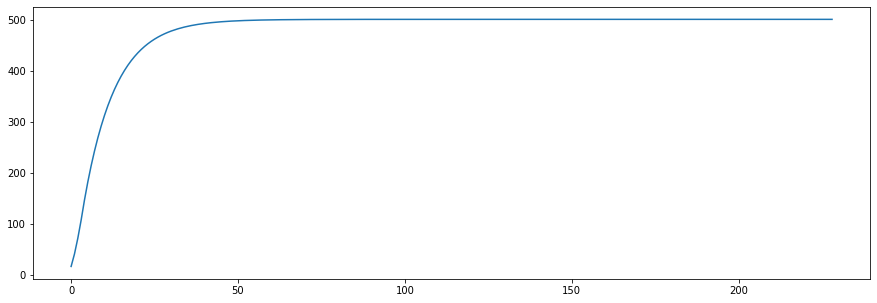

In [52]:
policy=caller(actions,states,P_tr,R_tr,gamma)

In [53]:
policy

(array([[2.37219334e-07, 9.99344712e-01, 3.27525410e-04, 3.27525410e-04],
        [7.22707326e-04, 7.22707326e-04, 9.97831878e-01, 7.22707326e-04],
        [4.99991650e-01, 8.34933053e-06, 4.99991650e-01, 8.35071094e-06],
        [9.99730480e-01, 1.34737976e-04, 1.34737976e-04, 4.41590476e-08],
        [9.99899725e-01, 5.01339576e-05, 6.75676905e-09, 5.01339576e-05],
        [1.66983822e-05, 1.66983822e-05, 8.37239942e-10, 9.99966602e-01]]),
 500.4152944655599)

In [54]:
np.argmax(policy[0],axis=1)

array([1, 2, 0, 0, 0, 3])